# Data analysis

In [2]:
import os
import sys

# set the working dir to the parent working dir
current_working_dir = os.getcwd()
print(f'Previous working dir: {current_working_dir}')
new_working_dir = current_working_dir.replace('notebooks', '')
os.chdir(new_working_dir)
sys.path.insert(0, new_working_dir)
print(f'Current working dir: {os.getcwd()}')

Previous working dir: /home/albert/PycharmProjects/traffic_sign_recognition/notebooks
Current working dir: /home/albert/PycharmProjects/traffic_sign_recognition


## 1. Data Imbalance
Check whether there is an inbalance in the class sizes (are there classes with way less or way more examples then the others).

Conclusion:
There is a great inbalance among the classes: there are some with ... and some with ... elements, hence a method should be used for rebalancing them.

Possible methods:
<ol>
  <li>Under-sampling: sample elements to train from the larger classes (it can be different for every epoch to use all examples for the whole training). </li>
  <li>Over-sampling: reuse elements from the smaller classes (it should be augmented and can be different for every epoch to minimize overfitting). </li>
  <li>Ensemble: use ensemble of models trained on the small classes and different brackets of the larger classes (it is computationally expensive). </li>
</ol>

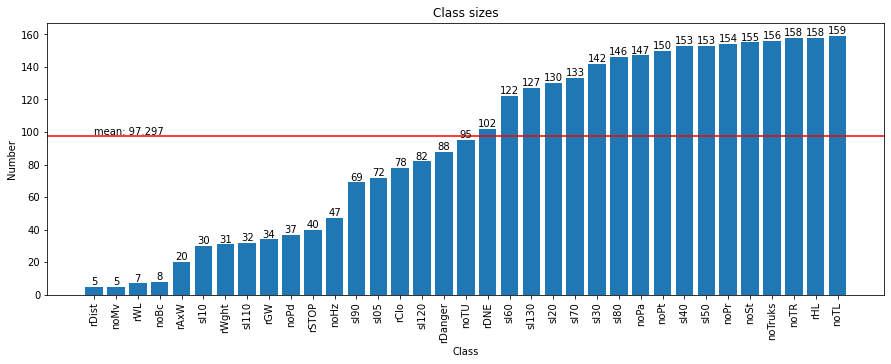

In [3]:
# show the class sizes
from data.utils.read_data import read_paths
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from data.utils.split_train_val import load_csv
import csv

with open('/home/albert/data/R-jpg/train.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

class_num_to_name = dict(load_csv('classnumber_classname.csv'))
classnumbers = list(zip(*data))[-1]
classnames = [class_num_to_name[classnumber] for classnumber in classnumbers]

# load the data and get the class names and sizes
class_names = np.array(list(Counter(classnames).keys())) # equals to list(set(words))
class_sizes = np.array(list(Counter(classnames).values())) # counts the elements' frequency
class_sizes_mean = np.mean(class_sizes)

# sort the classes according to the class size
sorting_indices = np.argsort(class_sizes)[:-2]
class_sizes = class_sizes[sorting_indices]
class_names = class_names[sorting_indices]

# plot
fig = plt.figure(figsize=[15, 5])
plt.bar(class_names, class_sizes)
plt.axhline(class_sizes_mean, color="red")
plt.text(0, class_sizes_mean, f'mean: {class_sizes_mean:.3f}', va='bottom', ha="left")
plt.xticks(rotation=90)
plt.title('Class sizes')
plt.xlabel('Class')
plt.ylabel('Number')
for i in range(len(class_sizes)):
    plt.annotate(str(class_sizes[i]), 
                 xy=(class_names[i],class_sizes[i]), 
                 ha='center', va='bottom')
plt.show()

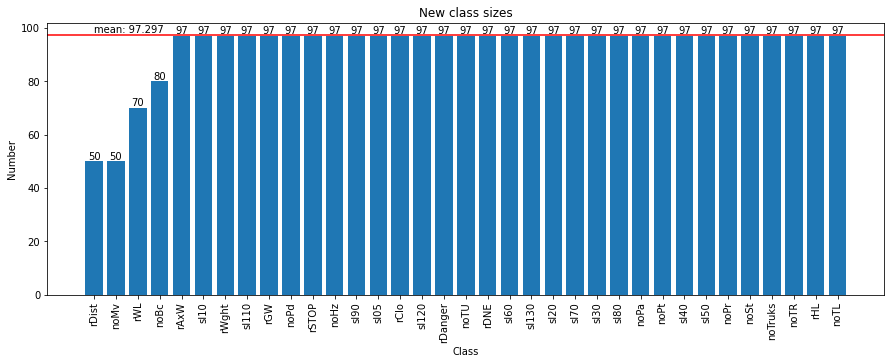

In [6]:
class_sizes_rates = [min(10, class_sizes_mean/class_size) for class_size in class_sizes]
new_class_sizes = [int(class_size_rate*class_size) 
                   for class_size_rate, class_size in zip(class_sizes_rates, class_sizes)]

# plot
fig = plt.figure(figsize=[15, 5])
plt.bar(class_names, new_class_sizes)
plt.axhline(class_sizes_mean, color="red")
plt.text(0, class_sizes_mean, f'mean: {class_sizes_mean:.3f}', va='bottom', ha="left")
plt.xticks(rotation=90)
plt.title('New class sizes')
plt.xlabel('Class')
plt.ylabel('Number')
for i in range(len(new_class_sizes)):
    plt.annotate(str(new_class_sizes[i]), 
                 xy=(class_names[i],new_class_sizes[i]), 
                 ha='center', va='bottom')
plt.show()

## 2. Mean and std 

In [8]:
import torchvision.transforms.functional as F
from PIL import Image

datapaths = list(zip(*data))[0]


mean = 0.
std = 0.
nb_samples = 0.
for datapath in datapaths:
    with Image.open(datapath) as im:
        image = F.to_tensor(im)
    mean += image.mean([1, 2])
    std += image.std([1, 2])
    nb_samples += 1

mean /= nb_samples
std /= nb_samples
print(f'mean: {mean}, std: {std}')

mean: tensor([0.4432, 0.3938, 0.3764]), std: tensor([0.1560, 0.1815, 0.1727])
